In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load and read the data set
df = pd.read_csv(r'/content/train_loan (1).csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# basic info about the dataset
print('Dataset shape:', df.shape)
print('Columns:', df.columns)

Dataset shape: (614, 13)
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
#Check for missing values and general info
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


missing values are present the given data

In [ ]:
 # fill with mode (common for categorical variables) or median (for numerical variables)
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-8-565873222.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-8-565873222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
##  drop the Loan_ID column as it is insignificant to provide
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)


/tmp/ipython-input-10-2455453169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Property_Area', y='LoanAmount', data=df, palette='Set2')


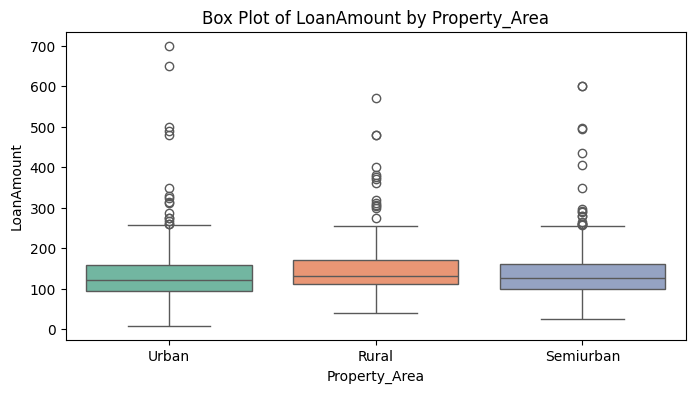

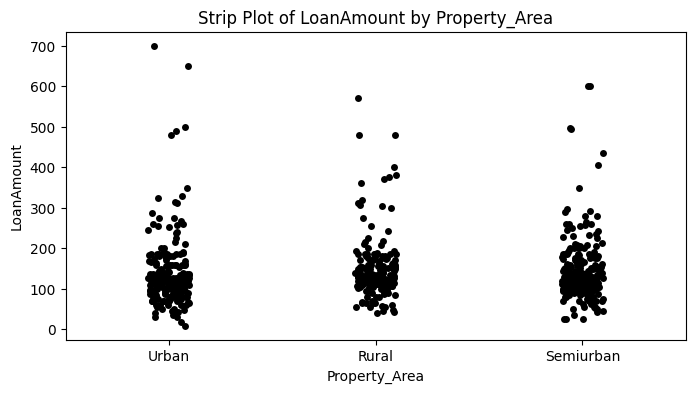

In [ ]:
# Box Plot and Strip Plot for LoanAmount across different Property_Area groups
plt.figure(figsize=(8,4))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df, palette='Set2')
plt.title('Box Plot of LoanAmount by Property_Area')
plt.show()

plt.figure(figsize=(8,4))
sns.stripplot(x='Property_Area', y='LoanAmount', data=df, jitter=True, color='black')
plt.title('Strip Plot of LoanAmount by Property_Area')
plt.show()

In [ ]:
# Encode target variable: Loan_Status is assumed to be 'Y' and 'N'
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
# Use pd.get_dummies to encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
